In [4]:
import networkx as nx
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import os

In [5]:
network_names = ["hetero_cc_0.05","hetero_cc_0.5","hetero_cc_0.34",
            "hetero_deg_var_4.46","hetero_deg_var_8.76","hetero_deg_var_30.35",
            "homog_regular"]
r0_eff_1s = [7.5979,6.7715,7.0015,9.4369,11.6031,23.9461,9.0196]
r0_eff_2s = [9.9194,8.5079,9.0902,12.685,15.0565,30.7804,11.708]
r0_eff_3s = [5.8561,6.9722,6.0076,7.2128,10.8681,21.0562,7.3140]
epi_sizes = [0.6635,0.2493,0.6117,0.6387,0.6164,0.6068,0.6818]
peak_infs = [0.5993,0.1790,0.4939,0.5180,0.5077,0.5232,0.6060]
peak_times = [424,883,575,558,516,476,467]
per_1s = [0.0151,0.0170,0.0164,0.0122,0.0099,0.0048,0.0128]
per_2s = [0.0130,0.0152,0.0142,0.0102,0.0086,0.0042,0.0110]
per_3s = [0.0245,0.0206,0.0239,0.0199,0.0132,0.0068,0.0197]
fixation_2s = [0.92,0,0.54,0.54,0.62,0.66,0.84]
fixation_3s = [0.02,0,0,0.02,0.02,0.26,0.06]

networks = []
first_moments = []
second_moments = []
deg_var = []
clustering_coeffs = []
for name in network_names:
    path = "data/networks"
    header = os.path.join(path, f"{name}.txt")
    G = nx.read_edgelist(header)
    mapping = {node: i for i, node in enumerate(G.nodes())}
    G = nx.relabel_nodes(G, mapping)
    networks.append(G)
    
    degrees = [d for n, d in G.degree()]
    first = sum(degrees) / len(degrees)
    second = sum(d**2 for d in degrees) / len(degrees)
    first_moments.append(first)
    second_moments.append(second)
    deg_var.append(second - first**2)

    adj_matrix = np.array(nx.adjacency_matrix(G).todense())
    A2 = np.linalg.matrix_power(adj_matrix, 2)
    A3 = np.linalg.matrix_power(adj_matrix, 3)
    clustering_coeffs.append(nx.transitivity(G))#(np.trace(A3) / (np.linalg.norm(A2) - np.trace(A2)))


results = pd.DataFrame({"network": networks,"network_name":network_names,"r0_eff_1":r0_eff_1s,"r0_eff_2":r0_eff_2s,"r0_eff_3":r0_eff_3s,"epi_size":epi_sizes,"peak_inf":peak_infs,"peak_time":peak_times,"per_1":per_1s,"per_2":per_2s,"per_3":per_3s,"first_moment":first_moments,"second_moment":second_moments,"deg_var": deg_var,"clustering_coeff":clustering_coeffs,"fixation_2":fixation_2s,"fixation_3":fixation_3s})

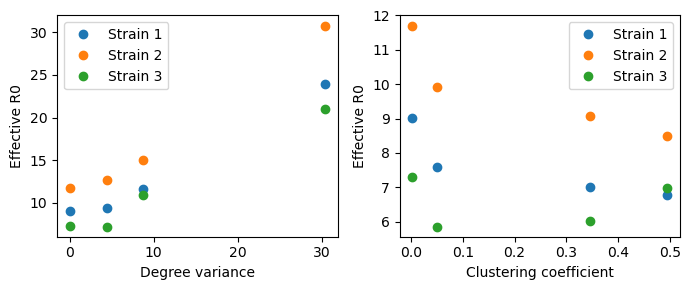

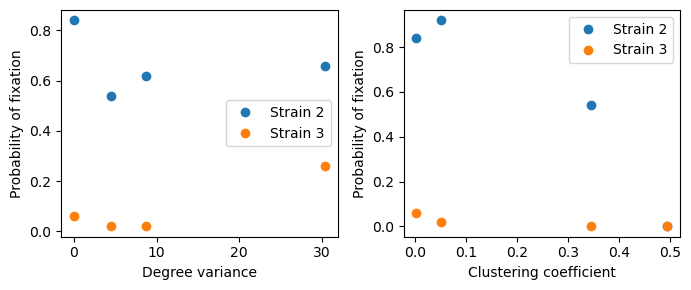

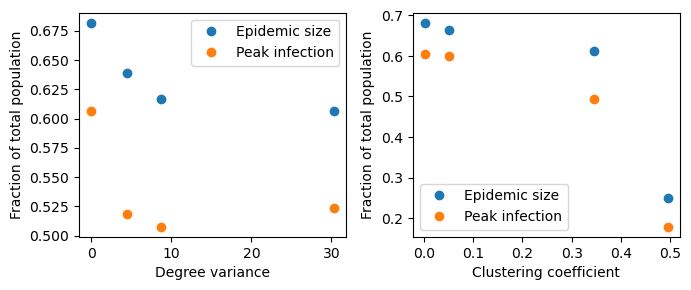

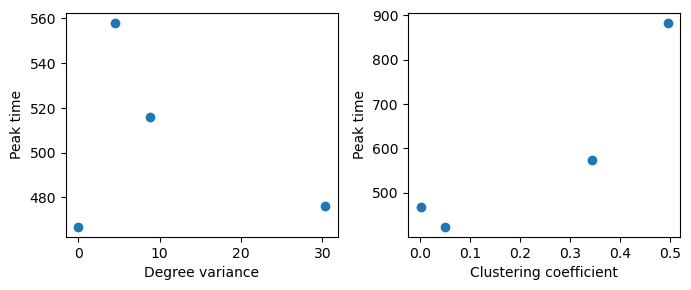

In [17]:
output_dir = "results_stats"
results_var = results[~results["network_name"].str.contains("cc")]
results_cc = results[~results["network_name"].str.contains("var")]

plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.plot(results_var["deg_var"],results_var["r0_eff_1"],'o',label="Strain 1")
plt.plot(results_var["deg_var"],results_var["r0_eff_2"],'o',label="Strain 2")
plt.plot(results_var["deg_var"],results_var["r0_eff_3"],'o',label="Strain 3")
plt.xlabel("Degree variance")
plt.ylabel("Effective R0")
plt.legend()

plt.subplot(1,2,2)
plt.plot(results_cc["clustering_coeff"],results_cc["r0_eff_1"],'o',label="Strain 1")
plt.plot(results_cc["clustering_coeff"],results_cc["r0_eff_2"],'o',label="Strain 2")
plt.plot(results_cc["clustering_coeff"],results_cc["r0_eff_3"],'o',label="Strain 3")
plt.xlabel("Clustering coefficient")
plt.ylabel("Effective R0")
plt.legend()
plt.tight_layout()
output_path = os.path.join(output_dir,"r0_eff")
plt.savefig(f"{output_path}.png")


plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.plot(results_var["deg_var"],results_var["fixation_2"],'o',label="Strain 2")
plt.plot(results_var["deg_var"],results_var["fixation_3"],'o',label="Strain 3")
plt.xlabel("Degree variance")
plt.ylabel("Probability of fixation")
plt.legend()

plt.subplot(1,2,2)
plt.plot(results_cc["clustering_coeff"],results_cc["fixation_2"],'o',label="Strain 2")
plt.plot(results_cc["clustering_coeff"],results_cc["fixation_3"],'o',label="Strain 3")
plt.xlabel("Clustering coefficient")
plt.ylabel("Probability of fixation")
plt.legend()
plt.tight_layout()
output_path = os.path.join(output_dir,"p_fix")
plt.savefig(f"{output_path}.png")


plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.plot(results_var["deg_var"],results_var["epi_size"],'o',label="Epidemic size")
plt.plot(results_var["deg_var"],results_var["peak_inf"],'o',label="Peak infection")
plt.xlabel("Degree variance")
plt.ylabel("Fraction of total population")
plt.legend()

plt.subplot(1,2,2)
plt.plot(results_cc["clustering_coeff"],results_cc["epi_size"],'o',label="Epidemic size")
plt.plot(results_cc["clustering_coeff"],results_cc["peak_inf"],'o',label="Peak infection")
plt.xlabel("Clustering coefficient")
plt.ylabel("Fraction of total population")
plt.legend()
plt.tight_layout()
output_path = os.path.join(output_dir,"size_inf")
plt.savefig(f"{output_path}.png")


plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plt.plot(results_var["deg_var"],results_var["peak_time"],'o',label="Epidemic size")
plt.xlabel("Degree variance")
plt.ylabel("Peak time")

plt.subplot(1,2,2)
plt.plot(results_cc["clustering_coeff"],results_cc["peak_time"],'o',label="Epidemic size")
plt.xlabel("Clustering coefficient")
plt.ylabel("Peak time")
plt.tight_layout()
output_path = os.path.join(output_dir,"peak_time")
plt.savefig(f"{output_path}.png")